# Radial velocity of a star

The spectre of the star *** was obtained by ESA's ESPRESSO telescope. An array of lines with the biggest contrast for a G9 star filter was chosen and along with the previously refered spectre was used in ARES program to obtain the gaussian functions wich best suited each line. This way, the arrays ori_lambda and lambda_fit bellow refer to the wavelenghts obtained from the filter and the means of the gaussian functions provided by ARES, respectively.

In [1]:
import numpy as np
from numpy import loadtxt
import scipy.constants as cnt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10 , 5)

data = loadtxt('test_espresso.ares' , float) # loads the file with the data
lines = loadtxt('lines_data.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength
lambda_fit = data[:,-1] # an array with the fitted values of the wavelength

ARES was given 229 lines to fit and found 224. The bellow code selects 224 lines to be used from the array ori_lambda, that can be found in the array lambda_ref.

In [2]:
# this lines identify the lines that should be used from the original line data
distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
lambda_ref = ori_lambda[closest_indices]

ARES makes a first estimate of the radial velocity and uses that value to make a correction to the spectre. The value of RV used by ARES was -16.600000 km/s(?). In this regard, we must take into consideration that the bellow RV is already corrected by that value.

In [3]:
N = len(lambda_ref)
RV = np.zeros(N) # empty array to save the value of the RV for each line

RV = (lambda_fit - lambda_ref) / lambda_ref * cnt.c # RV calculation

The bellow graphic shows the obtained values for the radial velocities. It is easy to notice the presence of some outliers. The mean ($\mu$), standard deviation ($\sigma$) and median of the values is also presented. Actually, the standard deviation is much bigger than the mean value, so the outliers were successivly removed until the standard deviation was smaller than the mean. All the values outside of $[\mu - \sigma , \mu + \sigma]$ were removed and new values for $\mu$, $\sigma$ and median were calculated.

mean = -123.47488 m/s ; standard deviation = 740.47966 m/s ; median = -51.93254 m/s


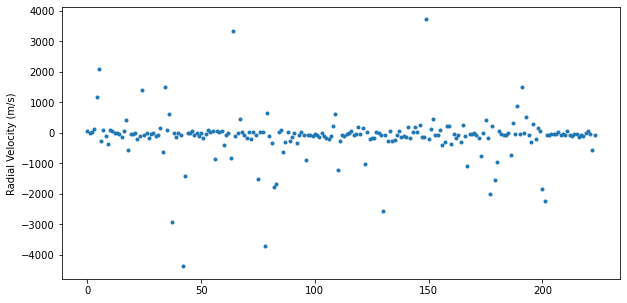

In [4]:
std = np.std(RV) #standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(mean,std,median))
plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = -52.06893 m/s ; standard deviation = 201.76700 m/s ; median = -43.34339 m/s


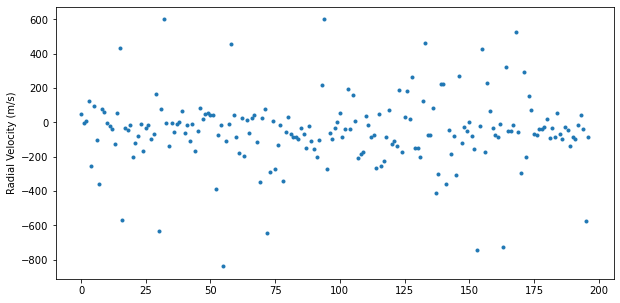

In [5]:
corrRV = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - std < rv < mean + std:
        corrRV = np.append(corrRV,rv)
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)
corr_median = np.median(corrRV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr_mean,corr_std,corr_median))
plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = -47.93292 m/s ; standard deviation = 77.10217 m/s ; median = -42.87077 m/s


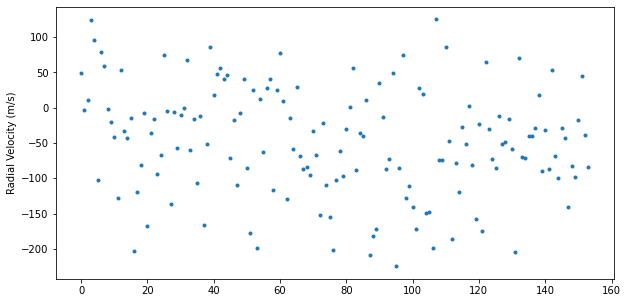

In [6]:
corr2RV = np.zeros(0)

for i , rv in enumerate(corrRV):
    if corr_mean - corr_std < rv < corr_mean + corr_std:
        corr2RV = np.append(corr2RV,rv)
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)
corr2_median = np.median(corr2RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr2_mean,corr2_std,corr2_median))
plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = -46.61445 m/s ; standard deviation = 39.61527 m/s ; median = -43.34339 m/s


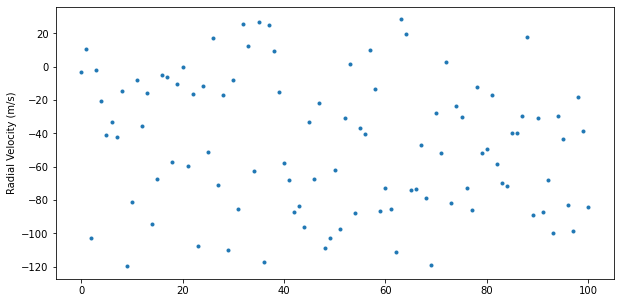

In [7]:
corr3RV = np.zeros(0)

for i , rv in enumerate(corr2RV):
    if corr2_mean - corr2_std < rv < corr2_mean + corr2_std:
        corr3RV = np.append(corr3RV,rv)
        
corr3_mean = np.mean(corr3RV)
corr3_std = np.std(corr3RV)
corr3_median = np.median(corr3RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr3_mean,corr3_std,corr3_median))
plt.plot(corr3RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.show()

mean = -46.50781 m/s ; standard deviation = 24.46419 m/s ; median = -42.87077 m/s


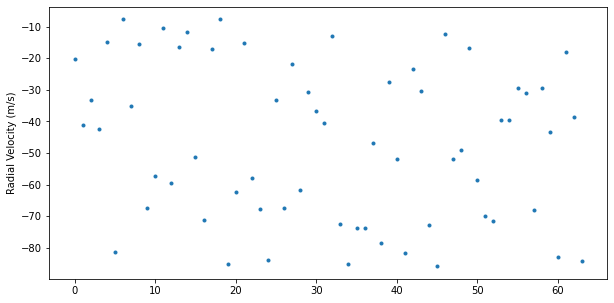

In [8]:
corr4RV = np.zeros(0)

for i , rv in enumerate(corr3RV):
    if corr3_mean - corr3_std < rv < corr3_mean + corr3_std:
        corr4RV = np.append(corr4RV,rv)
        
corr4_mean = np.mean(corr4RV)
corr4_std = np.std(corr4RV)
corr4_median = np.median(corr4RV)

print('mean = {:.5f} m/s ; standard deviation = {:.5f} m/s ; median = {:.5f} m/s'.format(corr4_mean,corr4_std,corr4_median))
plt.plot(corr4RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.show()

As we can see, while the median didn't change much, the mean did. The last two values of the mean and the median are actually close. If we use more wavelenghts the statistics can improve.